## Predicting fuel efficiency

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
# Note that importing 'sklearn' will not automatically import the submodel 'model_selection'
import sklearn.model_selection 

import torch

# Data preparation

In [2]:
feature_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv('data/auto-mpg.data', header=None, names=feature_names, na_values='?', comment='\t',
sep=" ", skipinitialspace=True)
df

# Two questions here:
# (1) why is comment='\t' used here, since there are no comment lines.
# (2) The car names in the file are stored as "...", with the quote marks explicitly in the file.
#     How to read these car names? Currently, they are shown as NaN.


# Possible answer to (1):
# At the end of each line in the data file, there is a car name stored as "abc". 
# In front of it, there is a tab. I guess that comment='\t' makes pd.read_csv ignore the car name.

# Possible answer to (2): see the following cell.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,NaN
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,NaN
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,NaN
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,NaN


In [3]:
# This read all the data, including the car names.
df = pd.read_csv('data/auto-mpg.data', 
                 delim_whitespace=True, 
                 header=None, 
                 names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'],
                 na_values='?')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [4]:
# Drop rows with missing data
df = df.dropna()
# Note that when we loaded the data, we use the option na_values='?'.
# Without this option, df.dropna will not drop the rows containing '?'.

In [5]:
# Reset index
df = df.reset_index(drop=True)
# df.reset_index() turns the old indices as a column and adds new integer indices.
# df.reset_index(drop=True): use the drop parameter to avoid the old index being added as a column

In [51]:
# The 'horsepower' power column seems to contain float numbers.
# But the values are of type 'object'.
# Here we change them to float

# Update!!
# This cell is abandoned. The reason is that previously without na_values='?', the dataframe contains
#     '?' even after df.dropna(). As a result, the column df['horsepower'] has 'object' as its datatype.
#     When the rows containing '?' are correctly dropped, df['horsepower'] naturally becomes
#     a column of type 'float'. So there is no need to use pd.to_numeric

# df['horsepower'] = pd.to_numeric(df['horsepower'])

In [6]:
# Split the data
# Previously, we needed to provide both the features X and the labels y
# Now we provide a pandas dataframe
df_train, df_test = sklearn.model_selection.train_test_split(df, train_size=0.8, random_state=1)

In [7]:
# dataframe.describe(): provide summary statistics
df_train_stats = df_train.describe()
df_train_stats

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,23.404153,5.402556,189.512780,102.929712,2961.198083,15.704473,75.929712,1.591054
std,7.666909,1.701506,102.675646,37.919046,848.602146,2.725399,3.675305,0.807923
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.500000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2219.000000,14.000000,73.000000,1.000000
50%,23.000000,4.000000,140.000000,92.000000,2755.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,260.000000,120.000000,3574.000000,17.300000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
# Normalization
# Prepare a list of feature names corresponding to numerical (not categorical) values
feature_name_numeric = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()
for feature in feature_name_numeric:
    mean = df_train_stats.loc['mean', feature]
    std = df_train_stats.loc['std', feature]
    df_train_norm[feature] = (df_train_norm[feature] - mean) / std
    df_test_norm[feature] = (df_test_norm[feature] - mean) / std

In [9]:
# Change model year to ordered labels (bucketing)
boundaries = torch.tensor([73, 76, 79])
v = torch.tensor(df_train_norm['model year'].values)
df_train_norm['model year bucketed'] = torch.bucketize(v, boundaries, right=False)

In [10]:
v = torch.tensor(df_test_norm['model year'].values)
df_test_norm['model year bucketed'] = torch.bucketize(v, boundaries, right=False)

In [11]:
# Explanation on torch.bucketize

# Prepare a test data set
test_data = torch.tensor([1.0, 2.5, 3.0, 4.2, 5.1, 6.8, 7.1])
# Boundaries of the bins
# Note that these are inner boundaries. The left boundary of the first bin is -inf.
# The right boundary of the last bin is inf.
# Here four inner boundaries are set, so there will be 5 bins, indexed as 0, 1, 2, 3, 4.
bins = torch.tensor([1.0, 3.0, 5.0, 7.0])
# Put data into different bins
# right=False: the right boundary of each bin is exclusive
label_bins = torch.bucketize(test_data, bins, right=False)
print(label_bins)

tensor([0, 1, 1, 2, 3, 3, 4])


In [12]:
# Add the bucket column name to the list 'feature_name_numeric'
feature_name_numeric.append('model year bucketed')

In [13]:
# One-hot encoding
num_origin = len(set(df_train_norm['origin'])) # See below for explanation on 'set'
num_origin

3

In [14]:
# set(): returns the unique elements
set(df_train_norm['origin'])

{1, 2, 3}

In [15]:
# About torch.nn.functional.one_hot
# The simplest example
print(torch.arange(0, 5))
print(torch.nn.functional.one_hot(torch.arange(0, 5)))

tensor([0, 1, 2, 3, 4])
tensor([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]])


In [16]:
# torch.nn.functional.one_hot only accepts tensor as input
# df_train_norm['origin'] is a pandas series
# We need to convert it into a tensor

# First note that the original values for 'origin' are 1,2,3
df_train_norm['origin'].values

array([1, 1, 2, 3, 2, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3,
       1, 1, 3, 2, 3, 1, 3, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       3, 1, 2, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 3, 2, 3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 3,
       2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3, 3, 1, 1, 1,
       1, 1, 1, 3, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 3, 3, 2, 3, 3, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 3, 3, 3, 1, 1, 1, 3, 2,
       1, 1, 3, 1, 3, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 1, 1, 1, 3, 3, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3,
       1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3,
       3, 1, 2, 1, 3, 3, 1, 1, 2, 1, 1, 3, 1, 2, 2,

In [17]:
# torch.nn.functional.one_hot expects indices starting from 0
# So we subtract by 1, convert the result into a tensor, and pass it to torch.nn.functional.one_hot
torch.nn.functional.one_hot(torch.tensor(df_train_norm['origin'].values - 1))

tensor([[1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [1, 

In [18]:
# If we don't substract 1, the resulting one-hot label will have 4 entries in each row
torch.nn.functional.one_hot(torch.tensor(df_train_norm['origin'].values))

tensor([[0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        ...,
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0]])

In [25]:
# Now we are ready to apply one-hot encoding
# First we encode the labels in column 'origin'
one_hot_labels = torch.nn.functional.one_hot(torch.tensor(df_train_norm['origin'].values - 1))
one_hot_labels

tensor([[1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [1, 

In [31]:
# Now we create another tensor from numerical values in df_train_norm
X_train_numeric = torch.tensor(df_train_norm[feature_name_numeric].values)
X_train_numeric

tensor([[-8.2430e-01, -5.3092e-01, -4.9921e-01, -5.5526e-01, -1.6412e-03,
          3.0000e+00],
        [ 3.5113e-01,  3.4562e-01,  1.8646e-01,  7.7634e-01,  1.0991e+00,
          2.0000e+00],
        [-8.2430e-01, -8.9128e-01, -5.2559e-01, -8.7461e-01,  2.9189e-01,
          1.0000e+00],
        ...,
        [ 1.5266e+00,  1.1443e+00,  7.1390e-01,  1.3396e+00, -6.2540e-01,
          0.0000e+00],
        [-8.2430e-01, -8.9128e-01, -1.0530e+00, -1.0726e+00,  4.7535e-01,
          2.0000e+00],
        [ 1.5266e+00,  1.5631e+00,  1.6369e+00,  1.4704e+00, -1.3592e+00,
          0.0000e+00]], dtype=torch.float64)

In [76]:
# We need to concatenate the numeric features with the one-hot labels
X_train = torch.cat([X_train_numeric, one_hot_labels], dim=1)
# This code converts the entries in X_train into float32
# This is a tricky step. By default, the weight matrices generated by torch.nn.Sequential is of float32.
# If the training data is not float32, there will be an error when doing forward propagation.
X_train = X_train.float()
X_train

tensor([[-0.8243, -0.5309, -0.4992,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.3511,  0.3456,  0.1865,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8243, -0.8913, -0.5256,  ...,  0.0000,  1.0000,  0.0000],
        ...,
        [ 1.5266,  1.1443,  0.7139,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8243, -0.8913, -1.0530,  ...,  1.0000,  0.0000,  0.0000],
        [ 1.5266,  1.5631,  1.6369,  ...,  1.0000,  0.0000,  0.0000]])

In [77]:
# We follow the same steps to create the test data
one_hot_labels_test = torch.nn.functional.one_hot(torch.tensor(df_test_norm['origin'].values - 1))
X_test_numeric = torch.tensor(df_test_norm[feature_name_numeric].values)
X_test = torch.cat([X_test_numeric, one_hot_labels_test], dim=1)
X_test = X_test.float()
X_test

tensor([[-0.8243, -0.6770, -0.1564, -0.5364, -0.4419,  0.0000,  0.0000,  0.0000,
          1.0000],
        [-0.8243, -0.9010, -0.7366, -0.9312,  0.1084,  1.0000,  0.0000,  0.0000,
          1.0000],
        [-0.8243, -0.7939, -0.7366, -0.7202,  0.4020,  3.0000,  0.0000,  0.0000,
          1.0000],
        [-0.8243, -0.6673,  0.2392, -0.1098, -0.0750,  0.0000,  0.0000,  1.0000,
          0.0000],
        [-0.8243, -0.9595, -0.9475, -1.1386,  0.1818,  3.0000,  0.0000,  0.0000,
          1.0000],
        [-0.8243, -0.8913, -0.5256, -1.0443,  0.0717,  2.0000,  1.0000,  0.0000,
          0.0000],
        [-0.8243, -0.9108, -0.8948, -0.9100,  0.8423,  0.0000,  0.0000,  1.0000,
          0.0000],
        [ 1.5266,  1.2514,  1.2413,  1.5034, -0.4419,  0.0000,  1.0000,  0.0000,
          0.0000],
        [-0.8243, -0.9010, -0.2882, -0.7933,  0.4754,  0.0000,  0.0000,  0.0000,
          1.0000],
        [-0.8243, -0.8036, -0.8157, -0.7909,  0.4754,  3.0000,  0.0000,  0.0000,
          1.0000],


In [78]:
# Now the features are prepared.
# We still need to create target labels, which is the mpg data
y_train = torch.tensor(df_train_norm['mpg'].values)
y_train = y_train.float()
y_train

tensor([27.2000, 18.6000, 29.0000, 37.2000, 33.0000, 13.0000, 22.4000, 44.6000,
        27.4000, 31.0000, 24.0000, 28.0000, 17.6000, 15.0000, 11.0000, 12.0000,
        26.8000, 13.0000, 21.6000, 20.8000, 16.9000, 20.0000, 26.5000, 18.0000,
        26.0000, 24.0000, 29.5000, 20.2000, 32.8000, 14.0000, 16.0000, 31.8000,
        30.7000, 34.1000, 20.0000, 15.0000, 28.4000, 20.0000, 13.0000, 35.0000,
        31.0000, 44.0000, 27.0000, 17.0000, 34.1000, 14.0000, 23.0000, 28.1000,
        14.5000, 24.0000, 29.9000, 36.0000, 23.9000, 15.0000, 16.0000, 20.0000,
        16.0000, 24.0000, 23.9000, 11.0000, 14.0000, 19.0000, 30.0000, 21.0000,
        15.0000, 23.0000, 18.0000, 29.0000, 18.0000, 12.0000, 33.0000, 29.5000,
        19.0000, 14.0000, 19.0000, 26.6000, 36.0000, 38.0000, 24.0000, 13.0000,
        16.0000, 17.5000, 19.0000, 16.0000, 27.0000, 16.5000, 20.3000, 24.0000,
        30.0000, 23.0000, 17.0000, 18.0000, 25.5000, 13.0000, 24.0000, 16.0000,
        26.0000, 19.4000, 17.0000, 30.90

In [80]:
y_test = torch.tensor(df_test_norm['mpg'].values)
y_test = y_test.float()
y_test

tensor([23.0000, 29.0000, 32.4000, 19.0000, 38.0000, 33.5000, 26.0000, 14.0000,
        28.0000, 32.4000, 21.5000, 41.5000, 17.0000, 33.5000, 29.0000, 17.0000,
        36.0000, 43.4000, 14.0000, 20.0000, 26.0000, 16.0000, 15.0000, 15.5000,
        15.0000, 18.5000, 31.5000, 20.0000, 21.0000, 30.0000, 19.2000, 24.5000,
        13.0000, 22.0000, 20.5000, 17.5000, 18.0000, 19.2000, 38.0000, 27.0000,
        15.5000, 14.0000, 20.0000, 19.0000, 18.0000, 15.0000, 11.0000, 31.0000,
        22.0000, 13.0000, 17.0000, 20.5000, 28.0000, 32.0000, 29.8000, 18.0000,
        28.8000, 21.0000, 33.5000, 36.1000, 38.0000, 28.0000, 37.0000, 19.9000,
        22.5000, 19.0000, 19.0000, 14.0000, 31.9000, 12.0000, 37.0000, 19.2000,
        13.0000, 34.3000, 26.0000, 35.7000, 14.0000, 13.0000, 13.0000])

# Training a Dense Neural Network

In [81]:
# Prepare a dataset
dataset_train =  torch.utils.data.TensorDataset(X_train, y_train)

In [82]:
# Prepare a dataloader
torch.manual_seed(1)
batch_size = 8
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

In [83]:
# Create a dense network
# The first hidden layer has 8 neurons
# The second hidden layer has 4 neurons
# The output layer is simply a linear layer with scalar output, since this is a regression problem.

input_size = X_train.shape[1]


model = torch.nn.Sequential(torch.nn.Linear(input_size,8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 1))
model

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [84]:
# Define a loss function
loss_fn = torch.nn.MSELoss()
# Define an optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [87]:
# Train the model
num_epoch = 200
log_epoch = 20

loss_history_train = []
loss_history_test = []

num_train = len(X_train)

for epoch in range(num_epoch):
    # Loss for all training data
    loss_train = 0
    for X_batch, y_batch in dataloader_train:
        pred = model(X_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        # loss is a tensor. We need to extract its value by using item()
        loss_train += loss.item() * len(X_batch)
    loss_train /= num_train
    loss_history_train.append(loss_train)
    
    pred = model(X_test)[:,0]
    loss_test = loss_fn(pred, y_test)
    loss_history_test.append(loss_test.item())
    
    if epoch % log_epoch == 0:
        print(f'Epoch {epoch}, Loss {loss_train}')

Epoch 0, Loss 534.3643589446339
Epoch 20, Loss 7.06433017609028
Epoch 40, Loss 6.552436389862158
Epoch 60, Loss 6.635329810194314
Epoch 80, Loss 6.227665164885811
Epoch 100, Loss 6.456776005772356
Epoch 120, Loss 6.389741701059068
Epoch 140, Loss 5.664601301613708
Epoch 160, Loss 5.565009224172027
Epoch 180, Loss 5.4943155313071355


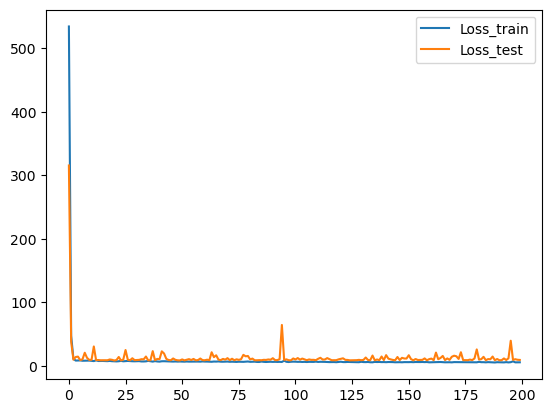

In [88]:
# Plot the loss for the training and test datasets
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(loss_history_train, label="Loss_train")
ax.plot(loss_history_test, label="Loss_test")
ax.legend()